In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# Leer dataset
df = pd.read_csv('kyphosis.csv')

In [14]:
# Previsualización de datos
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


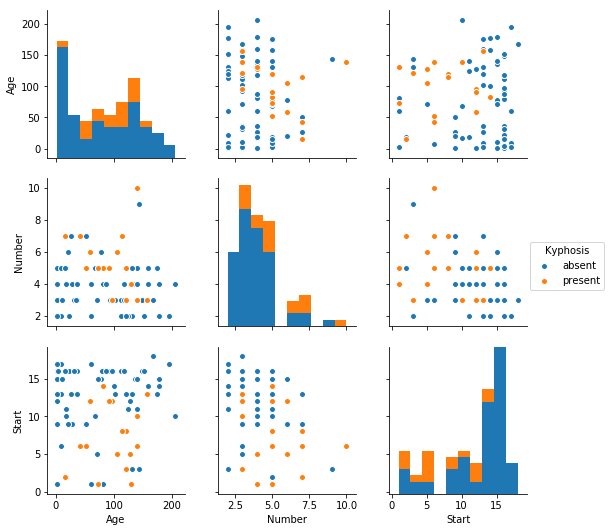

In [15]:
# Graficación
sns.pairplot(df, hue='Kyphosis')

In [37]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Features
X = df.drop('Kyphosis', axis=1)

In [19]:
# Target
y = df['Kyphosis']

In [21]:
# Separar datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [25]:
# Entrenamiento
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

In [30]:
# Predicción
predictions = dtree.predict(X_test)

In [35]:
# Resultados de predicción
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[19  1]
 [ 3  4]]
             precision    recall  f1-score   support

     absent       0.86      0.95      0.90        20
    present       0.80      0.57      0.67         7

avg / total       0.85      0.85      0.84        27



In [38]:
# Entrenar
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

In [40]:
# Predecir
rfc_pred = rfc.predict(X_test)

In [42]:
#Resultados de predicción
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[19  1]
 [ 4  3]]
             precision    recall  f1-score   support

     absent       0.83      0.95      0.88        20
    present       0.75      0.43      0.55         7

avg / total       0.81      0.81      0.80        27



In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [44]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

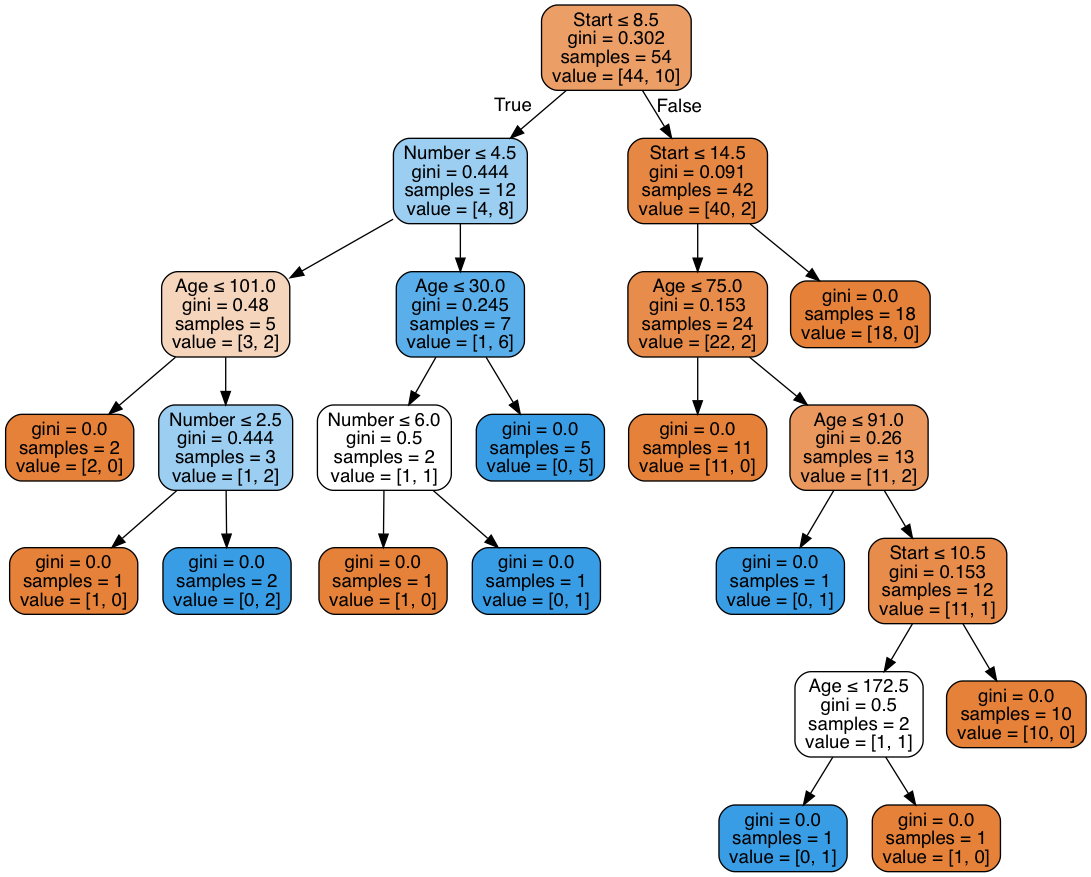

In [47]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())